In [1]:
import sys
import os
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import math
import _pickle as pickle

sys.path.insert(0,'..')
import pyathena as pa

In [2]:
import pandas as pd

from pyathena import LoadSim
from pyathena.util.units import Units

from pyathena.tigress_ncr.hst import Hst
from pyathena.tigress_ncr.load_sim_tigress_ncr import LoadSimTIGRESSNCRAll

In [3]:
models = dict(classic = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8/',
              ncr = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8/',
              no_spiral = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8/',
              no_spiral_early = '/data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3/')
              #demo = '/data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y2.xy1024.eps0.np768.has/')
sa = pa.LoadSimTIGRESSNCRAll(models)

# MODELS
ncr = sa.set_model('ncr')
classic = sa.set_model('classic')
no_spiral = sa.set_model('no_spiral')
no_spiral_early = sa.set_model('no_spiral_early')
#demo = sa.set_model('demo')

#ds = s.load_vtk(s.nums[0])

LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.full.y1.b10.v3.768.xy2048.eps1.e-8.
/home/comejuliet/miniconda3/envs/pyathena/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: rst files not found in /data/comejuliet/NCRSP/R8_8pc_NCRSP.classic.y1.b10.v3.768.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WARNING: zprof files not found in /data/comejuliet/NCRSP/R8b_8pc_NCR.full.v3.xy2048.eps1.e-8.
LoadSimTIGRESSNCR-WA

In [4]:
s = ncr

num = s.nums[5]
dp_s = s.load_vtk(num=num)
dp = dp_s.get_field(['density','pressure','xHII','net_cool_rate'])
#dp['pok'] = dp['pressure'][:,:,0:115]*units.pok + dp['pressure'][:,:,190:]*units.pok
dp['pok'] = dp['pressure'][:,:,:]*s.u.pok
#dp['density'] = dp['density'][:,:,0:115] + dp['density'][:,:,190:]
dp['density'] = dp['density'][:,:,:]
#dp['xHII'] = dp['xHII'][:,:,0:115] + dp['xHII'][:,:,190:]

In [5]:
# PDF

#This is domain information
xmin=s.domain['le']
xmax=s.domain['re']
dx=s.domain['dx']

# set up cell centered coordinates
x=np.arange(xmin[0],xmax[0],dx[0])+0.5*dx[0]
y=np.arange(xmin[1],xmax[1],dx[1])+0.5*dx[1]
z=np.arange(xmin[2],xmax[2],dx[2])+0.5*dx[2]

# These set up for operating on arrays with the same dimensions as s slices
#X, Y = np.meshgrid(x,y)
#X, Z = np.meshgrid(x,z)
#Y, Z = np.meshgrid(y,z)


#This sets up for image plots based on the domain physical size
xyextent=[xmin[0],xmax[0],xmin[1],xmax[1]]
xzextent=[xmin[0],xmax[0],xmin[2],xmax[2]]
yzextent=[xmin[1],xmax[1],xmin[2],xmax[2]]
print(xyextent,xzextent,yzextent)

[-1024.0, 1024.0, -1024.0, 1024.0] [-1024.0, 1024.0, -3072.0, 3072.0] [-1024.0, 1024.0, -3072.0, 3072.0]


In [6]:
print(x)

[-1020. -1012. -1004.  -996.  -988.  -980.  -972.  -964.  -956.  -948.
  -940.  -932.  -924.  -916.  -908.  -900.  -892.  -884.  -876.  -868.
  -860.  -852.  -844.  -836.  -828.  -820.  -812.  -804.  -796.  -788.
  -780.  -772.  -764.  -756.  -748.  -740.  -732.  -724.  -716.  -708.
  -700.  -692.  -684.  -676.  -668.  -660.  -652.  -644.  -636.  -628.
  -620.  -612.  -604.  -596.  -588.  -580.  -572.  -564.  -556.  -548.
  -540.  -532.  -524.  -516.  -508.  -500.  -492.  -484.  -476.  -468.
  -460.  -452.  -444.  -436.  -428.  -420.  -412.  -404.  -396.  -388.
  -380.  -372.  -364.  -356.  -348.  -340.  -332.  -324.  -316.  -308.
  -300.  -292.  -284.  -276.  -268.  -260.  -252.  -244.  -236.  -228.
  -220.  -212.  -204.  -196.  -188.  -180.  -172.  -164.  -156.  -148.
  -140.  -132.  -124.  -116.  -108.  -100.   -92.   -84.   -76.   -68.
   -60.   -52.   -44.   -36.   -28.   -20.   -12.    -4.     4.    12.
    20.    28.    36.    44.    52.    60.    68.    76.    84.    92.
   100

In [7]:
#This gives the physical size of the domain (x,y,z):
print(s.domain['Lx'])

[2048. 2048. 6144.]


In [8]:
#rough procedure to find the indexes corresponding to the coordinate of xmin and xmax of the arm region

idx_min = np.where(x == -252)
idx_max = np.where( x == 492)
xmin = int(x[idx_min])
xmax = int(x[idx_max])
print(idx_min)
print(idx_max)

(array([96]),)
(array([189]),)


Text(0.5, 0.98, '$\\chi_0=1;\\;\\xi_{\\rm 0}=2\\times 10^{-16}\\,{\\rm s}^{-1}$')

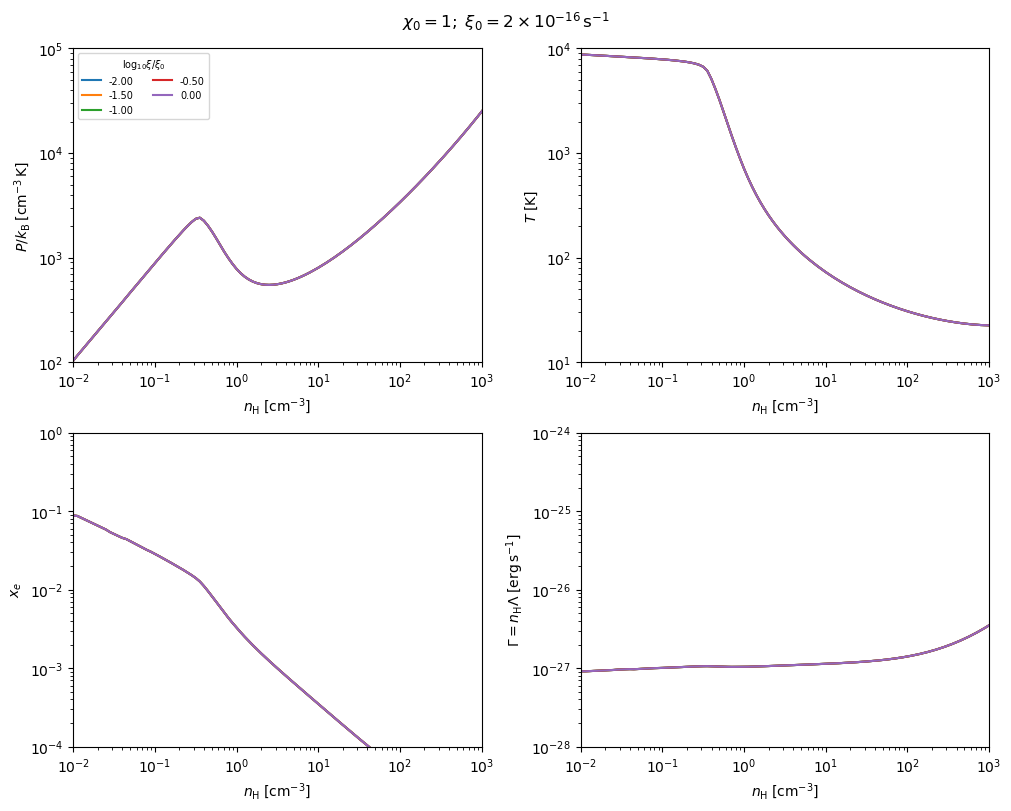

In [9]:
# EQUILIBRIUM CURVE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,2,figsize=(10,8),constrained_layout=True)

xi = np.arange(-2.0,0.5,0.5)
for xi_ in xi:
    #fname = '../data/noshld_zg0.0_zd0.0_xi{0:.2f}.txt'.format(xi_)
    #df = pd.read_csv(fname, sep='\s+')
    df = pd.read_csv('noshld_zg-1.0_zd-1.0_chi-1.0.txt', sep='\s+')
    df['T'] = df['pok']/(df['nH']*(1.1 + df['xe'] - df['xH2']))
    
    axes[0,0].loglog(df['nH'],df['pok'], label='{0:.2f}'.format(xi_))
    axes[0,1].loglog(df['nH'],df['T'])
    axes[1,0].loglog(df['nH'],df['xe'])
    axes[1,1].loglog(df['nH'],df['Gamma'])
    
plt.sca(axes[0,0])
plt.ylim(1e2,1e5)
plt.ylabel(r'$P/k_{\rm B}\;[{\rm cm}^{-3}\,{\rm K}]$')
plt.legend(fontsize='x-small',ncol=2,title=r'$\log_{10} \xi/\xi_{\rm 0}$',
           title_fontsize='x-small')
                     
plt.sca(axes[0,1])
plt.ylim(1e1,1e4)
plt.ylabel(r'$T\;[{\rm K}]$')
plt.sca(axes[1,0])
plt.ylim(1e-4,1)
plt.ylabel(r'$x_e$')
plt.sca(axes[1,1])
plt.ylim(1e-28,1e-24)
plt.ylabel(r'$\Gamma=n_{\rm H}\Lambda\;[{\rm erg}\,{\rm s}^{-1}]$')

for ax in axes.flatten():
    plt.sca(ax)
    plt.xlim(1e-2,1e3)
    plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
    
plt.suptitle(r'$\chi_0=1;\;\xi_{\rm 0}=2\times 10^{-16}\,{\rm s}^{-1}$')

In [19]:
# FOR THE ARM REGION

lx = dp['xHII'][:,:,0:96].data.flatten()
print(lx.shape)

ld=dp['density'][:,:,0:96].data.flatten()
#ld=dp['density'].data.flatten()
lp=dp['pok'][:,:,0:96].data.flatten() 
#lp=dp['pok'].data.flatten() 

lnet=dp.net_cool_rate[:,:,0:96].data.flatten()

print(ld.shape)
print(lp.shape)


(18874368,)
(18874368,)
(18874368,)


In [13]:
lx = dp['xHII'].data.flatten()

ld=dp['density'].data.flatten()

lp=dp['pok'].data.flatten() 

lnet=dp.net_cool_rate.data.flatten()

print(lx.shape)
print(ld.shape)
print(lp.shape)

(50331648,)
(50331648,)
(50331648,)


Text(0, 0.5, '$\\log{P_{\\rm th}/k_{\\rm B}}\\,[\\rm cm^{-3}\\, K]$')

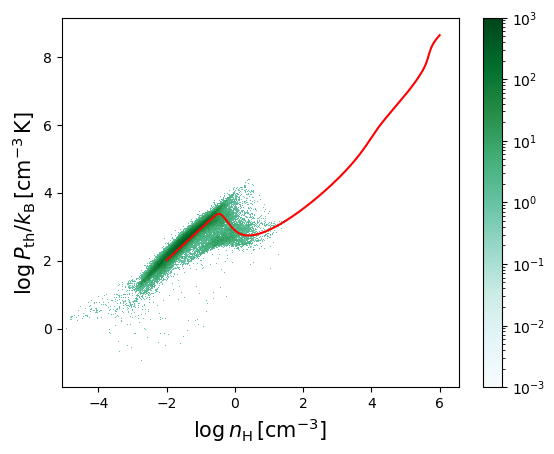

In [14]:
# VOLUME WEIGHTED (= NO WEIGHTED) PDF ACCORDING TO CHANG-GOO'S INSTRUCTIONS for neutral gas

ld_neu = np.log10(ld[np.where(lx < 0.5)])
lp_neu = np.log10(lp[np.where(lx < 0.5)])

h_neu,xedges_neu,yedges_neu=np.histogram2d(ld_neu,lp_neu,bins=[1000,1000])
ht_neu = np.transpose(h_neu)
dx_neu = xedges_neu[1] / xedges_neu[0]
dy_neu = yedges_neu[1] / yedges_neu[0]
pdf_neu = ht_neu/ dx_neu / dy_neu

xbins=0.5*(xedges_neu[1:]+xedges_neu[:-1])
ybins=0.5*(yedges_neu[1:]+yedges_neu[:-1])

plt.pcolormesh(xbins, ybins, pdf_neu, norm=LogNorm(10**-3,10**3), cmap='BuGn',shading='nearest')
plt.plot(np.log10(df['nH']),np.log10(df['pok']),color='red')
plt.colorbar()
plt.xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
plt.ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

Text(0, 0.5, '$\\log{P_{\\rm th}/k_{\\rm B}}\\,[\\rm cm^{-3}\\, K]$')

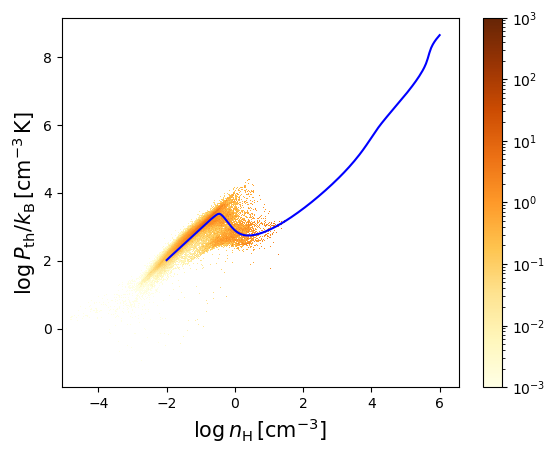

In [15]:
# MASS WEIGHTED PDF ACCORDING TO CHANG-GOO'S INSTRUCTIONS
ld_neu = ld[np.where(lx < 0.5)]
lp_neu = lp[np.where(lx < 0.5)]

h_neu,xedges_neu,yedges_neu=np.histogram2d(np.log10(ld_neu),np.log10(lp_neu),weights=ld_neu,bins=[1000,1000])
ht_neu = np.transpose(h_neu)
dx_neu = xedges_neu[1] / xedges_neu[0]
dy_neu = yedges_neu[1] / yedges_neu[0]
total = ld_neu.sum()
pdf_neu = ht_neu/ dx_neu / dy_neu / np.log10(total)

xbins=0.5*(xedges_neu[1:]+xedges_neu[:-1])
ybins=0.5*(yedges_neu[1:]+yedges_neu[:-1])

plt.pcolormesh(xbins, ybins, pdf_neu, norm=LogNorm(10**-3,10**3), cmap='YlOrBr',shading='nearest')
plt.plot(np.log10(df['nH']),np.log10(df['pok']),color='blue')
plt.colorbar()
plt.xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
plt.ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

Text(0, 0.5, '$\\log{P_{\\rm th}/k_{\\rm B}}\\,[\\rm cm^{-3}\\, K]$')

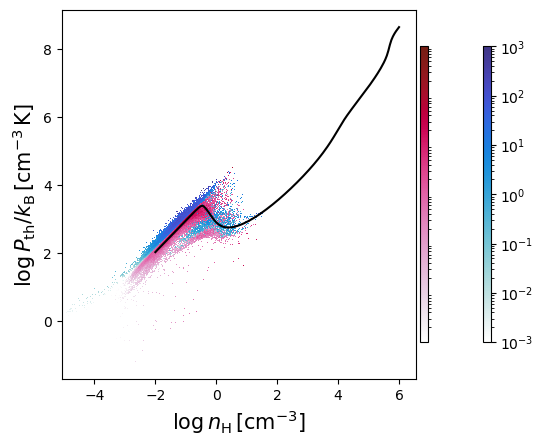

In [20]:
# NET COOLING WEIGHTED PDF ACCORDING TO CHANG-GOO'S INSTRUCTIONS
ld_neu = ld[np.where(lx < 0.5)]
lp_neu = lp[np.where(lx < 0.5)]
lnet_neu = lnet[np.where(lx < 0.5)]

h_neu,xedges_neu,yedges_neu=np.histogram2d(np.log10(ld_neu),np.log10(lp_neu),weights=lnet_neu,bins=[1000,1000])
ht_neu = np.transpose(h_neu)
dx_neu = xedges_neu[1] / xedges_neu[0]
dy_neu = yedges_neu[1] / yedges_neu[0]
total = lnet_neu.sum()
pdf_neu = ht_neu/ dx_neu / dy_neu / np.log10(total)

xbins=0.5*(xedges_neu[1:]+xedges_neu[:-1])
ybins=0.5*(yedges_neu[1:]+yedges_neu[:-1])

import cmasher as cmr
cmap1=cmr.get_sub_cmap(cmr.freeze_r,0.,0.7)
cmap2=cmr.get_sub_cmap(cmr.flamingo_r,0.,0.7)
cbar_kwargs=dict(shrink=0.8,orientation='vertical',location='right')

fig,ax = plt.subplots()
plt.plot(np.log10(df['nH']),np.log10(df['pok']),color='black')
im=plt.pcolormesh(xbins,ybins,pdf_neu,norm=LogNorm(10**-3,10**3),cmap=cmap1,shading='nearest')
cbar=plt.colorbar(im,ax=ax,aspect=40,pad=0,**cbar_kwargs)
im2=plt.pcolormesh(xbins,ybins,-pdf_neu,norm=LogNorm(10**-3,10**3),cmap=cmap2,shading='nearest')
cbar2=plt.colorbar(im2,ax=ax,aspect=40,pad=0.01,**cbar_kwargs)
cbar2.ax.yaxis.set_ticks([])
ax.set_xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
ax.set_ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

#plt.pcolormesh(xbins, ybins, pdf_neu, norm=LogNorm(10**-1,10**5), cmap='YlOrBr',shading='nearest')
#plt.colorbar()
#plt.xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
#plt.ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

Text(0, 0.5, '$\\log{P_{\\rm th}/k_{\\rm B}}\\,[\\rm cm^{-3}\\, K]$')

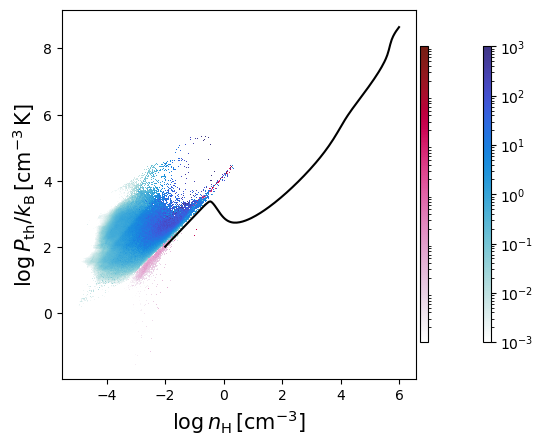

In [21]:
# NET COOLING WEIGHTED PDF ACCORDING TO CHANG-GOO'S INSTRUCTIONS
ld_neu = ld[np.where(lx > 0.5)]
lp_neu = lp[np.where(lx > 0.5)]
lnet_neu = lnet[np.where(lx > 0.5)]

h_neu,xedges_neu,yedges_neu=np.histogram2d(np.log10(ld_neu),np.log10(lp_neu),weights=lnet_neu,bins=[1000,1000])
ht_neu = np.transpose(h_neu)
dx_neu = xedges_neu[1] / xedges_neu[0]
dy_neu = yedges_neu[1] / yedges_neu[0]
total = lnet_neu.sum()
pdf_neu = ht_neu/ dx_neu / dy_neu / np.log10(total)

xbins=0.5*(xedges_neu[1:]+xedges_neu[:-1])
ybins=0.5*(yedges_neu[1:]+yedges_neu[:-1])

import cmasher as cmr
cmap1=cmr.get_sub_cmap(cmr.freeze_r,0.,0.7)
cmap2=cmr.get_sub_cmap(cmr.flamingo_r,0.,0.7)
cbar_kwargs=dict(shrink=0.8,orientation='vertical',location='right')

fig,ax = plt.subplots()
plt.plot(np.log10(df['nH']),np.log10(df['pok']),color='black')
im=plt.pcolormesh(xbins,ybins,pdf_neu,norm=LogNorm(10**-3,10**3),cmap=cmap1,shading='nearest')
cbar=plt.colorbar(im,ax=ax,aspect=40,pad=0,**cbar_kwargs)
im2=plt.pcolormesh(xbins,ybins,-pdf_neu,norm=LogNorm(10**-3,10**3),cmap=cmap2,shading='nearest')
cbar2=plt.colorbar(im2,ax=ax,aspect=40,pad=0.01,**cbar_kwargs)
cbar2.ax.yaxis.set_ticks([])
ax.set_xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
ax.set_ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)

#plt.pcolormesh(xbins, ybins, pdf_neu, norm=LogNorm(10**-1,10**5), cmap='YlOrBr',shading='nearest')
#plt.colorbar()
#plt.xlabel(r"$\log{n_{\rm H}}\,[\rm cm^{-3}]$",fontsize=15)
#plt.ylabel(r"$\log{P_{\rm th}/k_{\rm B}}\,[\rm cm^{-3}\, K]$",fontsize=15)